In [1]:
import pandas as pd
import numpy as np

import pickle

### prep chroma

In [2]:
train_df_chroma = r"D:\Workplace\.SPRING2025\AIL303m\Bee_Swarming\chroma_features_buzz1\Train_chroma_features.pkl"
val_df_chroma = r"D:\Workplace\.SPRING2025\AIL303m\Bee_Swarming\chroma_features_buzz1\Val_chroma_features.pkl"
test_df_chroma = r"D:\Workplace\.SPRING2025\AIL303m\Bee_Swarming\chroma_features_buzz1\Test_chroma_features.pkl"

with open(train_df_chroma, "rb") as f:
    train_chroma = pickle.load(f)

with open(val_df_chroma, "rb") as f:
    val_chroma = pickle.load(f)

with open(test_df_chroma, "rb") as f:
    test_chroma = pickle.load(f)

In [3]:
print(type(train_chroma))
print(len(train_chroma))
print(train_chroma[0].keys())

<class 'list'>
12600
dict_keys(['file_name', 'category', 'subcategory', 'chroma'])


In [4]:
import numpy as np

def preprocess_chroma(chroma_data):
    X = []
    y = []
    
    for item in chroma_data:
        chroma_features = np.mean(item['chroma'], axis=1)
        label = item['category']
        
        X.append(chroma_features)
        y.append(label)
    
    return np.array(X), np.array(y)

X_train_chroma, y_train_chroma = preprocess_chroma(train_chroma)
X_val_chroma, y_val_chroma = preprocess_chroma(val_chroma)
X_test_chroma, y_test_chroma = preprocess_chroma(test_chroma)

# Kiểm tra kích thước dữ liệu
print("X_train_chroma shape:", X_train_chroma.shape)
print("y_train shape:", y_train_chroma.shape)  
print("X_val_chroma shape:", X_val_chroma.shape)  
print("X_test_chroma shape:", X_test_chroma.shape)  


X_train_chroma shape: (12600, 12)
y_train shape: (12600,)
X_val_chroma shape: (3600, 12)
X_test_chroma shape: (4841, 12)


In [5]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_chroma = scaler.fit_transform(X_train_chroma)
X_val_chroma = scaler.transform(X_val_chroma)
X_test_chroma = scaler.transform(X_test_chroma)


### prep MFCC

In [6]:
train_mfcc = pd.read_csv("D:\Workplace\.SPRING2025\AIL303m\Bee_Swarming\mfcc_features_buzz1\Train_mfcc_features.csv")
val_mfcc = pd.read_csv("D:\Workplace\.SPRING2025\AIL303m\Bee_Swarming\mfcc_features_buzz1\Val_mfcc_features.csv")
test_mfcc = pd.read_csv("D:\Workplace\.SPRING2025\AIL303m\Bee_Swarming\mfcc_features_buzz1\Test_mfcc_features.csv")

In [7]:
train_mfcc = train_mfcc.drop(columns=['file_name'])
test_mfcc = test_mfcc.drop(columns=['file_name'])
val_mfcc = val_mfcc.drop(columns=['file_name'])

In [8]:
X_train_mfcc, y_train_mfcc = train_mfcc.drop(columns=['label']), train_mfcc['label']
X_test_mfcc, y_test_mfcc = test_mfcc.drop(columns=['label']), test_mfcc['label']
X_val_mfcc, y_val_mfcc = val_mfcc.drop(columns=['label']), val_mfcc['label']

In [9]:
print(f"Train shape: {X_train_mfcc.shape}, Test shape: {X_test_mfcc.shape}, Val shape: {X_val_mfcc.shape}")

Train shape: (12600, 120), Test shape: (4841, 120), Val shape: (3600, 120)


In [10]:
print(f"MFCC Train shape: {X_train_mfcc.shape}, Chroma Train shape: {X_train_chroma.shape}")
print(f"MFCC Val shape: {X_val_mfcc.shape}, Chroma Val shape: {X_val_chroma.shape}")
print(f"MFCC Test shape: {X_test_mfcc.shape}, Chroma Test shape: {X_test_chroma.shape}")


MFCC Train shape: (12600, 120), Chroma Train shape: (12600, 12)
MFCC Val shape: (3600, 120), Chroma Val shape: (3600, 12)
MFCC Test shape: (4841, 120), Chroma Test shape: (4841, 12)


### merge feature

In [11]:
X_train_chroma_df = pd.DataFrame(X_train_chroma, index=X_train_mfcc.index)
X_val_chroma_df = pd.DataFrame(X_val_chroma, index=X_val_mfcc.index)
X_test_chroma_df = pd.DataFrame(X_test_chroma, index=X_test_mfcc.index)

X_train_combined = pd.concat([X_train_mfcc, X_train_chroma_df], axis=1)
X_val_combined = pd.concat([X_val_mfcc, X_val_chroma_df], axis=1)
X_test_combined = pd.concat([X_test_mfcc, X_test_chroma_df], axis=1)

print(f"Combined Train shape: {X_train_combined.shape}")
print(f"Combined Val shape: {X_val_combined.shape}")
print(f"Combined Test shape: {X_test_combined.shape}")

Combined Train shape: (12600, 132)
Combined Val shape: (3600, 132)
Combined Test shape: (4841, 132)


In [12]:
print(f"X_train_mfcc.shape: {X_train_mfcc.shape}, X_train_chroma.shape: {X_train_chroma.shape}")
print(f"X_val_mfcc.shape: {X_val_mfcc.shape}, X_val_chroma.shape: {X_val_chroma.shape}")
print(f"X_test_mfcc.shape: {X_test_mfcc.shape}, X_test_chroma.shape: {X_test_chroma.shape}")


X_train_mfcc.shape: (12600, 120), X_train_chroma.shape: (12600, 12)
X_val_mfcc.shape: (3600, 120), X_val_chroma.shape: (3600, 12)
X_test_mfcc.shape: (4841, 120), X_test_chroma.shape: (4841, 12)


In [13]:
print(f"Train chroma samples: {len(train_chroma)}")
print(f"Val chroma samples: {len(val_chroma)}")
print(f"Test chroma samples: {len(test_chroma)}")

Train chroma samples: 12600
Val chroma samples: 3600
Test chroma samples: 4841


In [ ]:
X_train_combined.columns = X_train_combined.columns.astype(str)

# Giảm chiều bằng t-SNE
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

tsne = TSNE(n_components=2, random_state=42)
X_train_combined_tsne = tsne.fit_transform(X_train_combined)

plt.figure(figsize=(8, 6))
plt.scatter(X_train_combined_tsne[:, 0], X_train_combined_tsne[:, 1], c=y_train_mfcc, cmap='viridis', alpha=0.7)
plt.colorbar()
plt.title("Visualization using t-SNE")
plt.show()


### chuan hoa label

In [15]:
# Chuyển đổi nhãn của Chroma từ chuỗi sang số
label_mapping = {'None_swarming': 0, 'Swarming': 1}
y_train_chroma = np.array([label_mapping[label] for label in y_train_chroma])
y_val_chroma = np.array([label_mapping[label] for label in y_val_chroma])
y_test_chroma = np.array([label_mapping[label] for label in y_test_chroma])

# Kiểm tra lại
print(f"Unique Labels in Chroma (converted): {np.unique(y_train_chroma)}")


Unique Labels in Chroma (converted): [0 1]


In [16]:
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, classification_report
from sklearn.preprocessing import StandardScaler
import os
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV

### KNN

In [17]:
X_train_combined.columns = X_train_combined.columns.astype(str)
X_val_combined.columns = X_val_combined.columns.astype(str)
X_test_combined.columns = X_test_combined.columns.astype(str)

In [18]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_combined)
X_val_scaled = scaler.transform(X_val_combined)
X_test_scaled = scaler.transform(X_test_combined)

In [19]:
param_grid = {
    'n_neighbors': list(range(3, 100, 2)),
    'weights': ['uniform', 'distance'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']
}

knn = KNeighborsClassifier()

grid_search = GridSearchCV(
    estimator=knn, param_grid=param_grid, 
    cv=5, scoring='accuracy', n_jobs=-1, verbose=1
)

grid_search.fit(X_val_combined, y_val_mfcc)

best_params = grid_search.best_params_
best_score = grid_search.best_score_

print(f"Best Parameters: {best_params}")
print(f"Best Cross-Validation Accuracy: {best_score:.4f}")

Fitting 5 folds for each of 392 candidates, totalling 1960 fits
Best Parameters: {'algorithm': 'auto', 'n_neighbors': 77, 'weights': 'uniform'}
Best Cross-Validation Accuracy: 0.9997


In [20]:
best_knn = KNeighborsClassifier(
    n_neighbors=best_params['n_neighbors'], 
    weights=best_params['weights'], 
    algorithm=best_params['algorithm']
)

best_knn.fit(X_train_combined, y_train_mfcc)

y_pred_test = best_knn.predict(X_test_combined)
y_pred_val = best_knn.predict(X_val_combined)

def evaluate_model(y_true, y_pred):
    return {
        "accuracy": accuracy_score(y_true, y_pred),
        "f1_score": f1_score(y_true, y_pred),
        "classification_report": classification_report(y_true, y_pred, output_dict=True)
    }

test_results = evaluate_model(y_test_mfcc, y_pred_test)
val_results = evaluate_model(y_val_mfcc, y_pred_val)

print("\nTest Set Results:")
print(f"Accuracy: {test_results['accuracy']:.4f}")
print(f"F1 Score: {test_results['f1_score']:.4f}")
print("Classification Report:", test_results["classification_report"])

print("\nValidation Set Results:")
print(f"Accuracy: {val_results['accuracy']:.4f}")
print(f"F1 Score: {val_results['f1_score']:.4f}")
print("Classification Report:", val_results["classification_report"])


Test Set Results:
Accuracy: 0.4987
F1 Score: 0.5704
Classification Report: {'0': {'precision': 0.49173300673606857, 'recall': 0.33458333333333334, 'f1-score': 0.39821472848995787, 'support': 2400.0}, '1': {'precision': 0.5021820448877805, 'recall': 0.659975419909873, 'f1-score': 0.5703664365374402, 'support': 2441.0}, 'accuracy': 0.49865730221028715, 'macro avg': {'precision': 0.49695752581192454, 'recall': 0.49727937662160315, 'f1-score': 0.48429058251369905, 'support': 4841.0}, 'weighted avg': {'precision': 0.49700177395943745, 'recall': 0.49865730221028715, 'f1-score': 0.48501958685473884, 'support': 4841.0}}

Validation Set Results:
Accuracy: 0.4931
F1 Score: 0.3657
Classification Report: {'0': {'precision': 0.4950455806579469, 'recall': 0.6938888888888889, 'f1-score': 0.5778394633356465, 'support': 1800.0}, '1': {'precision': 0.4883936861652739, 'recall': 0.2922222222222222, 'f1-score': 0.3656586722280153, 'support': 1800.0}, 'accuracy': 0.4930555555555556, 'macro avg': {'precisi

### SVM

In [21]:
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100]}

scaler = StandardScaler()
X_Val_Scaled = scaler.fit_transform(X_val_combined)

svm = SVC(kernel='rbf')
grid_search = GridSearchCV(svm, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_Val_Scaled, y_val_mfcc)

best_C = grid_search.best_params_['C']
print(f"Best C found: {best_C}")

Best C found: 1


In [22]:
svm = SVC(kernel='rbf', C=1, shrinking=False)
svm.fit(X_train_combined, y_train_mfcc)

y_pred_test = svm.predict(X_test_combined)
y_pred_val = svm.predict(X_val_combined)

def evaluate_model(y_true, y_pred, dataset_name):
    accuracy = accuracy_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    report = classification_report(y_true, y_pred)

    print(f"{dataset_name} Performance:")
    print(f"   Accuracy: {accuracy:.4f}")
    print(f"   F1 Score: {f1:.4f}\n")
    print("Classification Report:\n", report)

    return {"accuracy": accuracy, "f1_score": f1, "report": report}

test_results = evaluate_model(y_test_mfcc, y_pred_test, "Test Set (comX_train_combined MFCC)")
val_results = evaluate_model(y_val_chroma, y_pred_val, "Validation Set (comX_train_combined MFCC)")

Test Set (comX_train_combined MFCC) Performance:
   Accuracy: 0.6701
   F1 Score: 0.7535

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.33      0.50      2400
           1       0.60      1.00      0.75      2441

    accuracy                           0.67      4841
   macro avg       0.80      0.67      0.63      4841
weighted avg       0.80      0.67      0.63      4841

Validation Set (comX_train_combined MFCC) Performance:
   Accuracy: 0.8164
   F1 Score: 0.8449

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.63      0.78      1800
           1       0.73      1.00      0.84      1800

    accuracy                           0.82      3600
   macro avg       0.87      0.82      0.81      3600
weighted avg       0.87      0.82      0.81      3600



### NB

In [23]:
nb_raw = GaussianNB()

nb_raw.fit(X_train_combined, y_train_mfcc)

y_test_pred_raw = nb_raw.predict(X_test_combined)
y_val_pred_raw = nb_raw.predict(X_val_combined)

def evaluate_model(y_true, y_pred, model_type):
    accuracy = accuracy_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    print(f"\n{model_type} Model Performance:")
    print(f"   Accuracy: {accuracy:.4f}")
    print(f"   F1 Score: {f1:.4f}")
    return accuracy, f1

print("\nEvaluating Naïve Bayes on Raw MFCC Features:")
test_results_raw = evaluate_model(y_test_mfcc, y_test_pred_raw, "NB Raw (Test)")
val_results_raw = evaluate_model(y_val_mfcc, y_val_pred_raw, "NB Raw (Validation)")


Evaluating Naïve Bayes on Raw MFCC Features:

NB Raw (Test) Model Performance:
   Accuracy: 0.9211
   F1 Score: 0.9261

NB Raw (Validation) Model Performance:
   Accuracy: 0.9486
   F1 Score: 0.9500


### RF

In [24]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
import numpy as np

# Chỉ giữ lại các cột dạng số
X_train_combined = X_train_combined.select_dtypes(include=[np.number])
X_test_combined = X_test_combined.select_dtypes(include=[np.number])
X_val_combined = X_val_combined.select_dtypes(include=[np.number])

# Chuyển đổi tên cột về dạng string nếu có cột dạng int
X_train_combined.columns = X_train_combined.columns.astype(str)
X_test_combined.columns = X_test_combined.columns.astype(str)
X_val_combined.columns = X_val_combined.columns.astype(str)

# Chuẩn hóa dữ liệu toàn bộ feature
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_combined)
X_test_scaled = scaler.transform(X_test_combined)
X_val_scaled = scaler.transform(X_val_combined)

print(f"Số lượng feature sử dụng: {X_train_scaled.shape[1]}")

# Đảm bảo y_train_mfcc và y_val_mfcc ở dạng mảng 1D
y_train_mfcc = np.ravel(y_train_mfcc)
y_val_mfcc = np.ravel(y_val_mfcc)

# Grid Search để tìm tham số tối ưu
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [10, 15, 20],  
    'min_samples_split': [5, 10],  
    'min_samples_leaf': [2, 5]  
}

grid_search = GridSearchCV(RandomForestClassifier(random_state=42, bootstrap=True), param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_val_scaled, y_val_mfcc)


best_params = grid_search.best_params_
print("\nBest Parameters:", best_params)

# Huấn luyện lại mô hình với tham số tối ưu
rf_final = RandomForestClassifier(**best_params, random_state=42)
rf_final.fit(X_train_scaled, y_train_mfcc)

# Dự đoán và đánh giá
y_test_pred = rf_final.predict(X_test_scaled)
y_val_pred = rf_final.predict(X_val_scaled)

evaluate_model(y_test_mfcc, y_test_pred, "rf Full Features (Test)")
evaluate_model(y_val_mfcc, y_val_pred, "rf Full Features (Validation)")

Số lượng feature sử dụng: 132

Best Parameters: {'max_depth': 10, 'min_samples_leaf': 5, 'min_samples_split': 5, 'n_estimators': 100}

rf Full Features (Test) Model Performance:
   Accuracy: 0.9866
   F1 Score: 0.9867

rf Full Features (Validation) Model Performance:
   Accuracy: 0.8972
   F1 Score: 0.8882


(0.8972222222222223, 0.8882175226586103)

In [25]:
rf_initial = RandomForestClassifier(n_estimators=100, random_state=42)
rf_initial.fit(X_train_combined, y_train_mfcc)

# Lấy độ quan trọng của từng feature
feature_importances = rf_initial.feature_importances_

# Chọn các feature có importance
threshold = np.mean(feature_importances)
important_features = np.where(feature_importances > threshold)[0]

# Lọc tập dữ liệu theo các feature quan trọng
X_train_selected = X_train_combined.iloc[:, important_features]
X_test_selected = X_test_combined.iloc[:, important_features]
X_val_selected = X_val_combined.iloc[:, important_features]

In [26]:
param_grid = {'n_estimators': list(range(25, 201, 5))}
rf = RandomForestClassifier()
grid_search = GridSearchCV(rf, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train_selected, y_train_mfcc)

best_params = grid_search.best_params_
print("Best n_estimators:", best_params['n_estimators'])


Best n_estimators: 85


In [27]:
# Hiển thị số feature trước và sau khi giảm chiều
num_features_before = X_train_combined.shape[1]
num_features_after = X_train_selected.shape[1]

print(f"\nSố lượng feature trước khi giảm chiều: {num_features_before}")
print(f"Số lượng feature sau khi giảm chiều: {num_features_after}")


Số lượng feature trước khi giảm chiều: 132
Số lượng feature sau khi giảm chiều: 24


In [28]:
rf_selected = RandomForestClassifier(n_estimators=best_params['n_estimators'], random_state=42)
rf_selected.fit(X_train_selected, y_train_mfcc)

# Dự đoán trên tập test và validation
y_test_pred_selected = rf_selected.predict(X_test_selected)
y_val_pred_selected = rf_selected.predict(X_val_selected)

# Hàm đánh giá mô hình
def evaluate_model(y_true, y_pred, model_type):
    accuracy = accuracy_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    print(f"\n{model_type} Model Performance:")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print(f"Classification Report:\n{classification_report(y_true, y_pred)}")
    return accuracy, f1

print("\nEvaluating Model after Feature Selection:")
selected_test_results = evaluate_model(y_test_mfcc, y_test_pred_selected, "rf Selected (Test)")
selected_val_results = evaluate_model(y_val_mfcc, y_val_pred_selected, "rf Selected (Validation)")



Evaluating Model after Feature Selection:

rf Selected (Test) Model Performance:
Accuracy: 0.9529
F1 Score: 0.9550
Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.91      0.95      2400
           1       0.92      0.99      0.95      2441

    accuracy                           0.95      4841
   macro avg       0.96      0.95      0.95      4841
weighted avg       0.96      0.95      0.95      4841


rf Selected (Validation) Model Performance:
Accuracy: 0.9053
F1 Score: 0.8971
Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.98      0.91      1800
           1       0.98      0.83      0.90      1800

    accuracy                           0.91      3600
   macro avg       0.92      0.91      0.90      3600
weighted avg       0.92      0.91      0.90      3600



In [29]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
import numpy as np

# Kết hợp tập Train và Validation để tính threshold
feature_importances_train = RandomForestClassifier(n_estimators=100, random_state=42).fit(X_train_combined, y_train_mfcc).feature_importances_
feature_importances_val = RandomForestClassifier(n_estimators=100, random_state=42).fit(X_val_combined, y_val_mfcc).feature_importances_

# Tính toán các ngưỡng threshold khác nhau
threshold_mean = np.mean(np.hstack([feature_importances_train, feature_importances_val]))
threshold_median = np.median(np.hstack([feature_importances_train, feature_importances_val]))
threshold_std = np.std(np.hstack([feature_importances_train, feature_importances_val]))

thresholds = {'mean': threshold_mean, 'median': threshold_median, 'std': threshold_std}
results = []

for method, threshold in thresholds.items():
    # Chọn các feature quan trọng dựa trên threshold
    important_features_idx = np.where(feature_importances_train >= threshold)[0]
    less_important_features_idx = np.where(feature_importances_train < threshold)[0]
    
    X_train_selected = X_train_combined.iloc[:, important_features_idx]
    X_test_selected = X_test_combined.iloc[:, important_features_idx]
    X_val_selected = X_val_combined.iloc[:, important_features_idx]
    
    # PCA trên các feature ít quan trọng
    scaler = StandardScaler()
    X_train_pca_input = scaler.fit_transform(X_train_combined.iloc[:, less_important_features_idx])
    X_test_pca_input = scaler.transform(X_test_combined.iloc[:, less_important_features_idx])
    X_val_pca_input = scaler.transform(X_val_combined.iloc[:, less_important_features_idx])
    
    # Chọn số component tối ưu dựa trên phương sai tích lũy
    pca = PCA().fit(X_train_pca_input)
    explained_variance = np.cumsum(pca.explained_variance_ratio_)
    n_pca_components = np.argmax(explained_variance >= 0.95) + 1  # 95% phương sai
    
    X_train_pca = pca.transform(X_train_pca_input)[:, :n_pca_components]
    X_test_pca = pca.transform(X_test_pca_input)[:, :n_pca_components]
    X_val_pca = pca.transform(X_val_pca_input)[:, :n_pca_components]
    
    # Ghép dữ liệu lại
    X_train_final = np.hstack((X_train_selected, X_train_pca))
    X_test_final = np.hstack((X_test_selected, X_test_pca))
    X_val_final = np.hstack((X_val_selected, X_val_pca))
    
    # GridSearch với RandomForest
    param_grid = {
        'n_estimators': [50, 100, 150],
        'max_depth': [10, 15, 20],  
        'min_samples_split': [5, 10],  
        'min_samples_leaf': [2, 5]  
    }

    grid_search = GridSearchCV(RandomForestClassifier(random_state=42, bootstrap=True), param_grid, cv=5, scoring='accuracy', n_jobs=-1)
    grid_search.fit(X_val_scaled, y_val_mfcc)
    
    best_params = grid_search.best_params_
    rf_final = RandomForestClassifier(**best_params, random_state=42)
    rf_final.fit(X_train_final, y_train_mfcc)
    
    y_test_pred = rf_final.predict(X_test_final)
    y_val_pred = rf_final.predict(X_val_final)
    
    test_acc = np.mean(y_test_pred == y_test_mfcc)
    val_acc = np.mean(y_val_pred == y_val_mfcc)
    
    results.append([method, X_train_final.shape[1], n_pca_components, test_acc, val_acc])

# Xuất kết quả ra file
results_df = pd.DataFrame(results, columns=['Method', 'Final Features', 'PCA Components', 'Test Accuracy', 'Validation Accuracy'])
results_df.to_csv("feature_selection_comparison.csv", index=False)
print(results_df)


   Method  Final Features  PCA Components  Test Accuracy  Validation Accuracy
0    mean              94              70       0.988019             0.909444
1  median             121              54       0.989878             0.911111
2     std              89              72       0.992150             0.921667


<Figure size 1200x600 with 0 Axes>

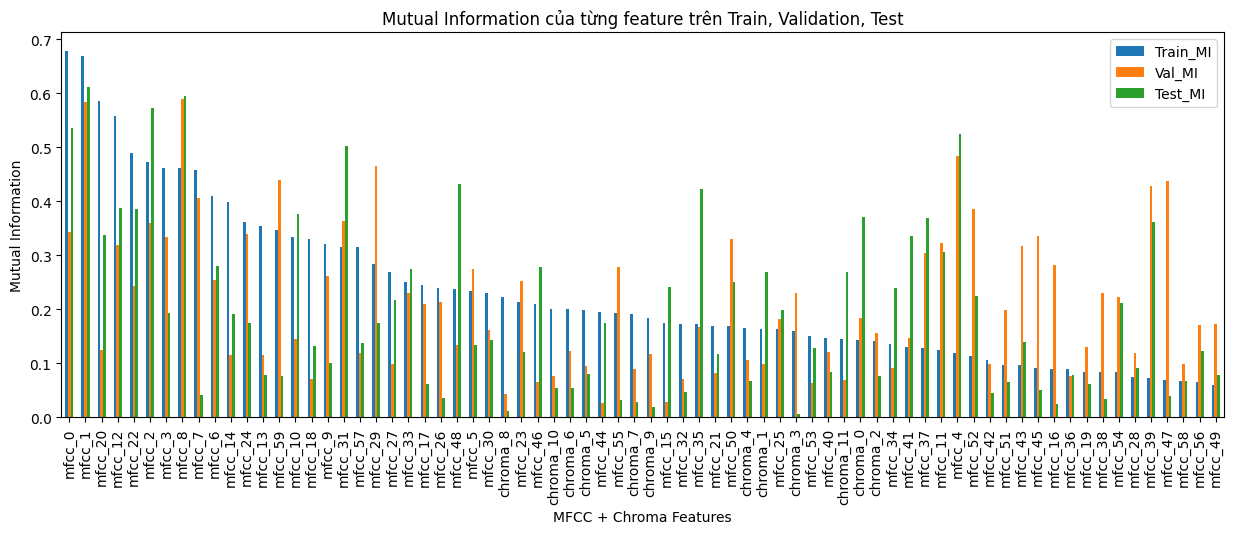

         Train_MI    Val_MI   Test_MI
mfcc_0   0.678667  0.343099  0.534915
mfcc_1   0.668390  0.583818  0.612591
mfcc_20  0.585792  0.125603  0.338114
mfcc_12  0.558274  0.318908  0.387220
mfcc_22  0.489689  0.243297  0.386485
mfcc_2   0.472233  0.359743  0.572690
mfcc_3   0.461893  0.334915  0.193488
mfcc_8   0.460837  0.589584  0.594433
mfcc_7   0.458413  0.406809  0.041655
mfcc_6   0.410660  0.255069  0.280137


In [30]:
import pandas as pd
from sklearn.feature_selection import mutual_info_classif
import matplotlib.pyplot as plt

# Định nghĩa hàm tính Mutual Information
def compute_mi(df, feature_cols, label_col):
    X = df[feature_cols].values
    y = df[label_col].values
    mi_scores = mutual_info_classif(X, y, discrete_features=False)
    return pd.Series(mi_scores, index=feature_cols)

# Load dữ liệu MFCC
train_mfcc = pd.read_csv("D:/Workplace/.SPRING2025/AIL303m/Bee_Swarming/mfcc_features_buzz1/Train_mfcc_features.csv")
val_mfcc = pd.read_csv("D:/Workplace/.SPRING2025/AIL303m/Bee_Swarming/mfcc_features_buzz1/Val_mfcc_features.csv")
test_mfcc = pd.read_csv("D:/Workplace/.SPRING2025/AIL303m/Bee_Swarming/mfcc_features_buzz1/Test_mfcc_features.csv")

# Load dữ liệu Chroma
train_chroma = pd.read_pickle("D:/Workplace/.SPRING2025/AIL303m/Bee_Swarming/chroma_features_buzz1/Train_chroma_features.pkl")
val_chroma = pd.read_pickle("D:/Workplace/.SPRING2025/AIL303m/Bee_Swarming/chroma_features_buzz1/Val_chroma_features.pkl")
test_chroma = pd.read_pickle("D:/Workplace/.SPRING2025/AIL303m/Bee_Swarming/chroma_features_buzz1/Test_chroma_features.pkl")

# Chuyển đổi Chroma thành DataFrame
train_chroma_df = pd.DataFrame({
    "file_name": [item['file_name'] for item in train_chroma],
    "label": [item['category'] for item in train_chroma],
    **{f'chroma_{i}': [item['chroma'][i].mean() for item in train_chroma] for i in range(12)}
})
val_chroma_df = pd.DataFrame({
    "file_name": [item['file_name'] for item in val_chroma],
    "label": [item['category'] for item in val_chroma],
    **{f'chroma_{i}': [item['chroma'][i].mean() for item in val_chroma] for i in range(12)}
})
test_chroma_df = pd.DataFrame({
    "file_name": [item['file_name'] for item in test_chroma],
    "label": [item['category'] for item in test_chroma],
    **{f'chroma_{i}': [item['chroma'][i].mean() for item in test_chroma] for i in range(12)}
})

# Chuyển đổi label của Chroma để khớp với MFCC
label_mapping = {"None_swarming": 0, "Swarming": 1}
train_chroma_df["label"] = train_chroma_df["label"].map(label_mapping)
val_chroma_df["label"] = val_chroma_df["label"].map(label_mapping)
test_chroma_df["label"] = test_chroma_df["label"].map(label_mapping)

# Gộp features từ MFCC và Chroma
def merge_features(mfcc_df, chroma_df):
    return mfcc_df.merge(chroma_df.drop(columns=["label"]), on="file_name")

train_combined = merge_features(train_mfcc, train_chroma_df)
val_combined = merge_features(val_mfcc, val_chroma_df)
test_combined = merge_features(test_mfcc, test_chroma_df)

# Xác định danh sách feature columns
feature_cols = [col for col in train_combined.columns if col.startswith("mfcc_") or col.startswith("chroma_")]
label_col = "label"

# Tính MI cho từng tập dữ liệu
mi_train = compute_mi(train_combined, feature_cols, label_col)
mi_val = compute_mi(val_combined, feature_cols, label_col)
mi_test = compute_mi(test_combined, feature_cols, label_col)

# Tạo DataFrame để so sánh
mi_comparison = pd.DataFrame({
    "Train_MI": mi_train,
    "Val_MI": mi_val,
    "Test_MI": mi_test
}).sort_values(by="Train_MI", ascending=False)

# Vẽ biểu đồ so sánh Mutual Information giữa các tập
plt.figure(figsize=(12, 6))
mi_comparison.plot(kind="bar", figsize=(15,5))
plt.title("Mutual Information của từng feature trên Train, Validation, Test")
plt.xlabel("MFCC + Chroma Features")
plt.ylabel("Mutual Information")
plt.show()

# Hiển thị 10 feature quan trọng nhất theo MI của Train
print(mi_comparison.head(10))

### Ensemble models

##### Soft Voting

In [31]:
from sklearn.ensemble import VotingClassifier, RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import ExtraTreesClassifier

best_models = [
    ("NB", GaussianNB()),
    ("Random Forest", RandomForestClassifier(
        n_estimators=70, criterion="entropy", max_depth=None, min_samples_split=2, random_state=42
    )),
    ("Extra Trees", ExtraTreesClassifier(
        criterion="gini", max_depth=None, min_samples_split=2, n_estimators=30, random_state=42
    ))
]

soft_voting_clf = VotingClassifier(estimators=best_models, voting='soft', n_jobs=-1)
soft_voting_clf.fit(X_train_final, y_train_chroma)

# Dự đoán
y_val_pred = soft_voting_clf.predict(X_val_final)
y_test_pred = soft_voting_clf.predict(X_test_final)

# Đánh giá
val_acc = accuracy_score((y_val_mfcc), y_val_pred)
test_acc = accuracy_score(y_test_mfcc, y_test_pred)

print("\nĐánh giá Soft Voting trên tập validation:")
print(classification_report(y_val_mfcc, y_val_pred))

print("\nĐánh giá Soft Voting trên tập test:")
print(classification_report(y_test_mfcc, y_test_pred))

print(f"Accuracy trên tập validation: {val_acc:.4f}")
print(f"Accuracy trên tập test: {test_acc:.4f}")


Đánh giá Soft Voting trên tập validation:
              precision    recall  f1-score   support

           0       1.00      0.94      0.97      1800
           1       0.94      1.00      0.97      1800

    accuracy                           0.97      3600
   macro avg       0.97      0.97      0.97      3600
weighted avg       0.97      0.97      0.97      3600


Đánh giá Soft Voting trên tập test:
              precision    recall  f1-score   support

           0       0.99      0.98      0.98      2400
           1       0.98      0.99      0.98      2441

    accuracy                           0.98      4841
   macro avg       0.98      0.98      0.98      4841
weighted avg       0.98      0.98      0.98      4841

Accuracy trên tập validation: 0.9667
Accuracy trên tập test: 0.9843


##### Hard Voting

In [32]:
from sklearn.ensemble import VotingClassifier, RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import ExtraTreesClassifier

best_models = [
    ("NB", GaussianNB()),
    ("Random Forest", RandomForestClassifier(
        n_estimators=70, criterion="entropy", max_depth=None, min_samples_split=2, random_state=42
    )),
    ("Extra Trees", ExtraTreesClassifier(
        criterion="gini", max_depth=None, min_samples_split=6, n_estimators=30, random_state=42
    ))
]

soft_voting_clf = VotingClassifier(estimators=best_models, voting='hard', n_jobs=-1)
soft_voting_clf.fit(X_train_final, y_train_mfcc)

# Dự đoán
y_val_pred = soft_voting_clf.predict(X_val_final)
y_test_pred = soft_voting_clf.predict(X_test_final)

# Đánh giá
val_acc = accuracy_score(y_val_mfcc, y_val_pred)
test_acc = accuracy_score(y_test_mfcc, y_test_pred)

print("\nĐánh giá Soft Voting trên tập validation:")
print(classification_report(y_val_mfcc, y_val_pred))

print("\nĐánh giá Soft Voting trên tập test:")
print(classification_report(y_test_mfcc, y_test_pred))

print(f"Accuracy trên tập validation: {val_acc:.4f}")
print(f"Accuracy trên tập test: {test_acc:.4f}")


Đánh giá Soft Voting trên tập validation:
              precision    recall  f1-score   support

           0       0.95      0.99      0.97      1800
           1       0.99      0.94      0.96      1800

    accuracy                           0.97      3600
   macro avg       0.97      0.97      0.97      3600
weighted avg       0.97      0.97      0.97      3600


Đánh giá Soft Voting trên tập test:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2400
           1       1.00      1.00      1.00      2441

    accuracy                           1.00      4841
   macro avg       1.00      1.00      1.00      4841
weighted avg       1.00      1.00      1.00      4841

Accuracy trên tập validation: 0.9656
Accuracy trên tập test: 0.9975


##### Weighted Voting

In [33]:
from sklearn.metrics import accuracy_score, classification_report
from sklearn.ensemble import VotingClassifier, RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import ExtraTreesClassifier

best_models = [
    ("NB", GaussianNB()),
    ("Random Forest", RandomForestClassifier(
        n_estimators=70, criterion="entropy", max_depth=None, min_samples_split=2, random_state=42
    ))
]


weights = []
for name, model in best_models:
    model.fit(X_train_final, y_train_mfcc)
    y_val_pred = model.predict(X_val_final)
    acc = accuracy_score(y_val_mfcc, y_val_pred)
    weights.append(acc)
    
print("Weights according to validation:", weights)

soft_voting_clf = VotingClassifier(estimators=best_models, voting='soft', weights=weights, n_jobs=-1)

soft_voting_clf.fit(X_train_final, y_train_mfcc)

y_val_pred = soft_voting_clf.predict(X_val_final)
y_test_pred = soft_voting_clf.predict(X_test_final)

val_acc = accuracy_score(y_val_mfcc, y_val_pred)
test_acc = accuracy_score(y_test_mfcc, y_test_pred)

print(f"Accuracy on validation: {val_acc:.4f}")
print(classification_report(y_val_mfcc, y_val_pred))

print(f"Accuracy on test: {test_acc:.4f}")
print(classification_report(y_test_mfcc, y_test_pred))

Weights according to validation: [0.9283333333333333, 0.9486111111111111]
Accuracy on validation: 0.9400
              precision    recall  f1-score   support

           0       1.00      0.88      0.94      1800
           1       0.89      1.00      0.94      1800

    accuracy                           0.94      3600
   macro avg       0.95      0.94      0.94      3600
weighted avg       0.95      0.94      0.94      3600

Accuracy on test: 0.9190
              precision    recall  f1-score   support

           0       0.99      0.85      0.91      2400
           1       0.87      0.99      0.93      2441

    accuracy                           0.92      4841
   macro avg       0.93      0.92      0.92      4841
weighted avg       0.93      0.92      0.92      4841



##### Stacking

In [34]:
from sklearn.ensemble import StackingClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Tạo các mô hình base
base_models = [
    ("NB", GaussianNB()),
    ("Random Forest", RandomForestClassifier(
        n_estimators=70, criterion="entropy", max_depth=None, min_samples_split=2, random_state=42
    ))
]

# Meta model - dùng Logistic Regression (thay vì Linear Regression vì bài toán phân loại)
meta_model = LogisticRegression(random_state=42)

# Tạo Stacking Classifier
stacking_clf = StackingClassifier(estimators=base_models, final_estimator=meta_model, cv=5, n_jobs=-1)

# Huấn luyện mô hình
stacking_clf.fit(X_train_final, y_train_mfcc)

# Dự đoán
y_val_pred = stacking_clf.predict(X_val_final)
y_test_pred = stacking_clf.predict(X_test_final)

# Đánh giá mô hình
val_acc = accuracy_score(y_val_mfcc, y_val_pred)
test_acc = accuracy_score(y_test_mfcc, y_test_pred)

print("\nĐánh giá Stacking trên tập validation:")
print(classification_report(y_val_mfcc, y_val_pred))
print(f"Accuracy trên tập validation: {val_acc:.4f}")

print("\nĐánh giá Stacking trên tập test:")
print(classification_report(y_test_mfcc, y_test_pred))
print(f"Accuracy trên tập test: {test_acc:.4f}")



Đánh giá Stacking trên tập validation:
              precision    recall  f1-score   support

           0       1.00      0.87      0.93      1800
           1       0.89      1.00      0.94      1800

    accuracy                           0.94      3600
   macro avg       0.94      0.94      0.94      3600
weighted avg       0.94      0.94      0.94      3600

Accuracy trên tập validation: 0.9364

Đánh giá Stacking trên tập test:
              precision    recall  f1-score   support

           0       0.99      0.85      0.91      2400
           1       0.87      0.99      0.92      2441

    accuracy                           0.92      4841
   macro avg       0.93      0.92      0.92      4841
weighted avg       0.93      0.92      0.92      4841

Accuracy trên tập test: 0.9188


In [35]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import accuracy_score, classification_report

# Định nghĩa tập tham số cần tìm kiếm
param_grid = {
    'criterion' :['gini', 'entropy', 'log_loss'],
    'n_estimators': [30, 40, 50, 60, 100, 150, 200],
    'max_depth': [ 10, 20, 30],
    'min_samples_split': [2, 3, 4, 5, 6, 7, 8, 9, 10]
}

# Khởi tạo mô hình Random Forest
rf_model = ExtraTreesClassifier(random_state=42)

# Khởi tạo GridSearchCV với 5-fold cross-validation
grid_search = GridSearchCV(
    rf_model, param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=1
)

# Chạy Grid Search trên tập huấn luyện
grid_search.fit(X_train_final, y_train_mfcc)

# Lấy tham số tốt nhất
best_params = grid_search.best_params_
print(f"🔍 Best parameters: {best_params}")

# Huấn luyện mô hình với tham số tối ưu
best_model = ExtraTreesClassifier(**best_params, random_state=42)
best_model.fit(X_train_final, y_train_mfcc)

# Dự đoán trên tập validation và test
y_val_pred = best_model.predict(X_val_final)
y_test_pred = best_model.predict(X_test_final)

# Đánh giá mô hình trên tập validation
print("\n📊 Đánh giá trên tập validation:")
print(classification_report(y_val_mfcc, y_val_pred))

# Đánh giá mô hình trên tập test
print("\n📊 Đánh giá trên tập test:")
print(classification_report(y_test_mfcc, y_test_pred))

# In accuracy trên validation và test
val_accuracy = accuracy_score(y_val_mfcc, y_val_pred)
test_accuracy = accuracy_score(y_test_mfcc, y_test_pred)
print(f"\n✅ Accuracy trên tập validation: {val_accuracy:.4f}")
print(f"✅ Accuracy trên tập test: {test_accuracy:.4f}")

Fitting 5 folds for each of 567 candidates, totalling 2835 fits


C:\Users\ADMIN\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\numpy\ma\core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


🔍 Best parameters: {'criterion': 'gini', 'max_depth': 10, 'min_samples_split': 6, 'n_estimators': 30}

📊 Đánh giá trên tập validation:
              precision    recall  f1-score   support

           0       0.89      0.99      0.94      1800
           1       0.99      0.88      0.93      1800

    accuracy                           0.94      3600
   macro avg       0.94      0.94      0.94      3600
weighted avg       0.94      0.94      0.94      3600


📊 Đánh giá trên tập test:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      2400
           1       0.99      0.99      0.99      2441

    accuracy                           0.99      4841
   macro avg       0.99      0.99      0.99      4841
weighted avg       0.99      0.99      0.99      4841


✅ Accuracy trên tập validation: 0.9369
✅ Accuracy trên tập test: 0.9917
